# Import the libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import math
import umap.umap_ as umap
from sklearn.metrics import davies_bouldin_score
%config InlineBackend.figure_format = 'svg'
import random
from sklearn import metrics
from sklearn import metrics

# Import the dataset

In [2]:
data = pd.read_excel(r'C:\Users\DANIYA\Downloads\Bank Customer Churn Preprocessed dataset (1).xlsx')

In [3]:
data


,Unnamed: 0,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,0,-0.326221,0,0,42,-1.041760,-1.225848,1,1,1,0.021886,1
1,1,-0.440036,2,0,41,-1.387538,0.117350,1,0,1,0.216534,0
2,2,-1.536794,0,0,42,1.032908,1.333053,3,1,0,0.240687,1
3,3,0.501521,0,0,39,-1.387538,-1.225848,2,0,0,-0.108918,0
4,4,2.063884,2,0,43,-1.041760,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1.246488,0,1,39,-0.004426,-1.225848,2,1,0,-0.066419,0
9996,9996,-1.391939,0,1,35,1.724464,-0.306379,1,1,1,0.027988,0
9997,9997,0.604988,0,0,36,0.687130,-1.225848,1,0,1,-1.008643,1
9998,9998,1.256835,1,1,42,-0.695982,-0.022608,2,1,0,-0.125231,1


In [4]:
data = data.drop(["Unnamed: 0"],axis=1)

In [5]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,-0.326221,0,0,42,-1.041760,-1.225848,1,1,1,0.021886,1
1,-0.440036,2,0,41,-1.387538,0.117350,1,0,1,0.216534,0
2,-1.536794,0,0,42,1.032908,1.333053,3,1,0,0.240687,1
3,0.501521,0,0,39,-1.387538,-1.225848,2,0,0,-0.108918,0
4,2.063884,2,0,43,-1.041760,0.785728,1,1,1,-0.365276,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,39,-0.004426,-1.225848,2,1,0,-0.066419,0
9996,-1.391939,0,1,35,1.724464,-0.306379,1,1,1,0.027988,0
9997,0.604988,0,0,36,0.687130,-1.225848,1,0,1,-1.008643,1
9998,1.256835,1,1,42,-0.695982,-0.022608,2,1,0,-0.125231,1


# UMAP

In [6]:
data_umap = data.drop(['churn'], axis=1, inplace = False )

In [7]:
data_umap

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,-0.326221,0,0,42,-1.041760,-1.225848,1,1,1,0.021886
1,-0.440036,2,0,41,-1.387538,0.117350,1,0,1,0.216534
2,-1.536794,0,0,42,1.032908,1.333053,3,1,0,0.240687
3,0.501521,0,0,39,-1.387538,-1.225848,2,0,0,-0.108918
4,2.063884,2,0,43,-1.041760,0.785728,1,1,1,-0.365276
...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0,1,39,-0.004426,-1.225848,2,1,0,-0.066419
9996,-1.391939,0,1,35,1.724464,-0.306379,1,1,1,0.027988
9997,0.604988,0,0,36,0.687130,-1.225848,1,0,1,-1.008643
9998,1.256835,1,1,42,-0.695982,-0.022608,2,1,0,-0.125231


# Feature types

In [8]:
data_umap.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

In [9]:
cont_list = ['credit_score', 'age', 'tenure', 'balance', 'estimated_salary']
ord_list = ['country', 'products_number']
nom_list = ['gender', 'credit_card', 'active_member']

In [10]:
def UMAP(UMAP_neb, min_dist_UMAP, metr, data, visual):
    import umap.umap_ as umap
   
    np.random.seed(42)
    colors_set1 = ["burlywood", "lightseagreen", "mediumorchid", "orange", "cornflowerblue", "plum", "yellowgreen"]
    customPalette_set1 = sns.set_palette(sns.color_palette(colors_set1))
    data_embedded = umap.UMAP(n_neighbors=UMAP_neb, min_dist=min_dist_UMAP, n_components=2, metric=metr, random_state=0).fit_transform(data)
    data_embedded[:,0]=(data_embedded[:,0]- np.mean(data_embedded[:,0]))/np.std(data_embedded[:,0])
    data_embedded[:,1]=(data_embedded[:,1]- np.mean(data_embedded[:,1]))/np.std(data_embedded[:,1])
    result = pd.DataFrame(data = data_embedded , 
        columns = ['UMAP_0', 'UMAP_1'])
    if visual==1:
        sns.lmplot( x="UMAP_0", y="UMAP_1",data=result,fit_reg=False,legend=False,scatter_kws={"s": 10},palette=customPalette_set1) 
        plt.show()
    else:
        pass
    return result

In [11]:
def Clustering(low_d_embedding, algo_dim_reduction, clustering_parameters, clustering_algorithm, visual):
    np.random.seed(42)
    from sklearn.metrics import silhouette_score
    from sklearn.cluster import DBSCAN
        
    colors_set1 = ["burlywood", "lightcoral", "lightseagreen", "mediumorchid", "orange",  "cornflowerblue", "plum", "yellowgreen"]
    customPalette_set1 = sns.set_palette(sns.color_palette(colors_set1))
    
    if clustering_algorithm=="DBSCAN":
        clustering = DBSCAN(eps=clustering_parameters["eps"], min_samples=clustering_parameters["min_samples"]).fit(low_d_embedding)
        
    else:
        return (print ("Invalid Clusering Algorithm Name"))
    
    clusters=clustering.fit_predict(low_d_embedding)
    (values,counts) = np.unique(clusters,return_counts=True)
    low_d_embedding['Cluster'] = clusters
    
    
    if visual==1:
        sns.lmplot( x=algo_dim_reduction+"_0", y=algo_dim_reduction+"_1",
        data=low_d_embedding,
        fit_reg=False, 
        legend=True,
        hue='Cluster', 
        scatter_kws={"s": 10},palette=customPalette_set1) 
        plt.savefig(clustering_algorithm+'.png', dpi=700, bbox_inches='tight')
        plt.show()
    else:
        pass
    
    cluster_labels=low_d_embedding.Cluster.to_list()
    
    if len(np.unique(np.array(cluster_labels)))>1:
        silhouette_score=silhouette_score(low_d_embedding,cluster_labels)
    else:
        silhouette_score=0
        
    return cluster_labels,counts,silhouette_score

In [12]:
def parameter_optimization_UMAP_DBSCAN(iterations, data):
    random.seed(42)
    np.random.seed(42)
    
    parameter_records_with_sil_score=[]
    for run in range (iterations):
        
        print('Running iteration number ', run+1 )
        
        n_neighbors_sample=random.choice(n_neighbors)
        min_dist_sample=random.choice(min_dist)
        eps_sample=random.choice(eps)
        min_samples_sample=random.choice(min_samples)

        
        UMAP_emb=UMAP(n_neighbors_sample, min_dist_sample, "euclidean", data, 0)
        
        cluster_labels, counts, sil_score=Clustering(UMAP_emb, "UMAP", {"eps":eps_sample,"min_samples":min_samples_sample}, "DBSCAN",0 )
        
        
        record=[n_neighbors_sample, min_dist_sample, eps_sample, min_samples_sample, sil_score]
        if len(counts)<10:
            parameter_records_with_sil_score.append(record)

    parameter_records_with_sil_score=np.array(parameter_records_with_sil_score)
    
    parameter_records_with_sil_score = sorted(parameter_records_with_sil_score, key=lambda parameter_records_with_sil_score_entry: parameter_records_with_sil_score_entry[-1]) 
    
    return parameter_records_with_sil_score

In [13]:
n_neighbors = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]
min_dist= [0.001, 0.01, 0.1]
eps=[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
min_samples=[10,20,30,40,50]

In [14]:
records_UMAP_DBSCAN= parameter_optimization_UMAP_DBSCAN(30, data_umap)

Running iteration number  1
Running iteration number  2
Running iteration number  3
Running iteration number  4
Running iteration number  5
Running iteration number  6
Running iteration number  7
Running iteration number  8
Running iteration number  9
Running iteration number  10
Running iteration number  11
Running iteration number  12
Running iteration number  13
Running iteration number  14
Running iteration number  15
Running iteration number  16
Running iteration number  17
Running iteration number  18
Running iteration number  19
Running iteration number  20
Running iteration number  21
Running iteration number  22
Running iteration number  23
Running iteration number  24
Running iteration number  25
Running iteration number  26
Running iteration number  27
Running iteration number  28
Running iteration number  29
Running iteration number  30


In [15]:
best_parameters_UMAP_DBSCAN=records_UMAP_DBSCAN[-1]

In [16]:
best_parameters_UMAP_DBSCAN

array([8.00000000e+00, 1.00000000e-03, 3.00000000e-01, 1.00000000e+01,
       3.06339096e-01])

*Best parameter choices*
>UMAP <br>
n_neighbors = 8<br>
min_dist = 0.001<br>

>DBSCAN<br>
eps = 0.3<br>
min_samples = 10

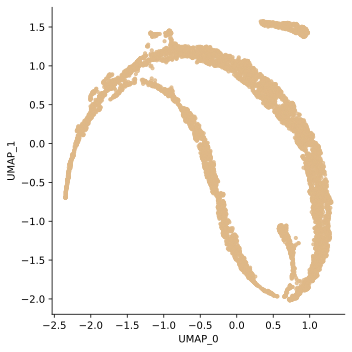

In [17]:
UMAP_emb=UMAP(8, 0.001, "euclidean", data, 1)

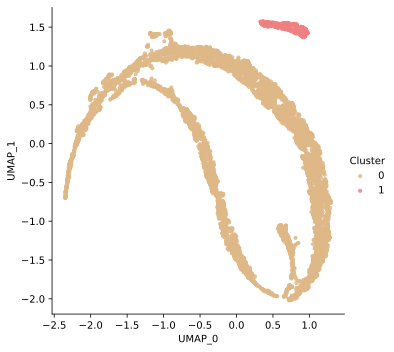

In [18]:
cluster_labels_UMAP_DBSCAN,counts_UMAP_DBSCAN,silhouette_score_UMAP_DBSCAN=Clustering(UMAP_emb, "UMAP", {"eps":0.3,"min_samples":10}, "DBSCAN", 1)

In [19]:
print('Silhouette scores for UMAP with DBSCAN clustering is:', silhouette_score_UMAP_DBSCAN)

Silhouette scores for UMAP with DBSCAN clustering is: 0.2522993387853817


In [20]:
print('Davies-Bouldin Index for UMAP with DBSACN clustering is:',davies_bouldin_score(data_umap, cluster_labels_UMAP_DBSCAN))

Davies-Bouldin Index for UMAP with DBSACN clustering is: 6.368626432599649


# Dunn Index Calculation

In [21]:
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances

def delta(ck, cl):
    values = np.ones([len(ck), len(cl)])*10000
    
    for i in range(0, len(ck)):
        for j in range(0, len(cl)):
            values[i, j] = np.linalg.norm(ck[i]-cl[j])
            
    return np.min(values)
    
def big_delta(ci):
    values = np.zeros([len(ci), len(ci)])
    
    for i in range(0, len(ci)):
        for j in range(0, len(ci)):
            values[i, j] = np.linalg.norm(ci[i]-ci[j])
            
    return np.max(values)
    
def dunn(k_list):
    """ Dunn index [CVI]
    
    Parameters
    ----------
    k_list : list of np.arrays
        A list containing a numpy array for each cluster |c| = number of clusters
        c[K] is np.array([N, p]) (N : number of samples in cluster K, p : sample dimension)
    """
    deltas = np.ones([len(k_list), len(k_list)])*1000000
    big_deltas = np.zeros([len(k_list), 1])
    l_range = list(range(0, len(k_list)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta(k_list[k], k_list[l])
        
        big_deltas[k] = big_delta(k_list[k])

    di = np.min(deltas)/np.max(big_deltas)
    return di

def delta_fast(ck, cl, distances):
    values = distances[np.where(ck)][:, np.where(cl)]
    values = values[np.nonzero(values)]

    return np.min(values)
    
def big_delta_fast(ci, distances):
    values = distances[np.where(ci)][:, np.where(ci)]
    #values = values[np.nonzero(values)]
            
    return np.max(values)

def dunn_fast(points, labels):
    """ Dunn index - FAST (using sklearn pairwise euclidean_distance function)
    
    Parameters
    ----------
    points : np.array
        np.array([N, p]) of all points
    labels: np.array
        np.array([N]) labels of all points
    """
    distances = euclidean_distances(points)
    ks = np.sort(np.unique(labels))
    
    deltas = np.ones([len(ks), len(ks)])*1000000
    big_deltas = np.zeros([len(ks), 1])
    
    l_range = list(range(0, len(ks)))
    
    for k in l_range:
        for l in (l_range[0:k]+l_range[k+1:]):
            deltas[k, l] = delta_fast((labels == ks[k]), (labels == ks[l]), distances)
        
        big_deltas[k] = big_delta_fast((labels == ks[k]), distances)

    di = np.min(deltas)/np.max(big_deltas)
    return di


In [22]:
print('Dunn Index for UMAP with DBSACN clustering is:',dunn_fast(data_umap, cluster_labels_UMAP_DBSCAN))

Dunn Index for UMAP with DBSACN clustering is: 0.01432287613186547


# Analysis of significant features using ANOVA

In [23]:
def list_of_cluster_dfs(df, cluster_labels):
    if -1 in np.unique(np.array(cluster_labels)):
        clusters=np.unique(np.array(cluster_labels))[1:]
    else:
        clusters=np.unique(np.array(cluster_labels))

    df_clusters=[]
    for cluster in clusters:
        cluster_df=df.iloc[np.where(np.array(cluster_labels)==clusters[cluster])]
        df_clusters.append(cluster_df)
    return df_clusters

In [24]:
cluster_df_list=list_of_cluster_dfs(data_umap,  cluster_labels_UMAP_DBSCAN )

In [25]:
def significant_features(df,cluster_df_list,threshold=0.05):
    from scipy.stats import f_oneway
    significant_features=[]
    for feature in df.columns:
        feature_distribution_cluster_wise=[]
        for cluster in range(len(cluster_df_list)):
            feature_distribution_cluster_wise.append(np.array(cluster_df_list[cluster][feature]))
        signifance_result=f_oneway(*feature_distribution_cluster_wise)
        if signifance_result[1]<threshold:
            significant_features.append(feature)
    return(np.array(significant_features))

In [26]:
sig_feats=significant_features(data_umap,cluster_df_list)

In [27]:
sig_feats

array(['country', 'balance', 'products_number', 'active_member'],
      dtype='<U15')